# 카이 제곱 분포

가우시안 정규 분포를 따르는 확률 변수 $X$ 의 $N$개의 샘플 $x_1, \cdots, x_N$의 합(또는 평균)은 샘플 분산으로 정규화하면 스튜던트-t 분포를 따른다는 것을 배웠다. 

그런데 이 $N$개의 샘플들을 단순히 더하는 것이 아니라 제곱을 하여 더하면 양수값만을 가지는 분포가 된다. 이 분포를 카이 제곱(chi-squared) 분포라고 하며 $\chi^2(x;\nu)$ 와 같이 표기한다. 카이 제곱 분포도 student-t 분포처럼 자유도(degree of freedom) 모수를 가진다.

$$ x_i \sim \mathcal{N}(x) $$
$$ \downarrow $$
$$ \sum_{i=1}^N x_i^2 \sim \chi^2(x;\nu=N) $$


카이 제곱 분포의 확률 밀도 함수는 다음과 같다.

$$ \chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)} $$

SciPy 의 stats 서브 패키지의 `chi2` 클래스를 사용하여 확률 밀도 함수의 모양을 살펴보면 다음과 같다.

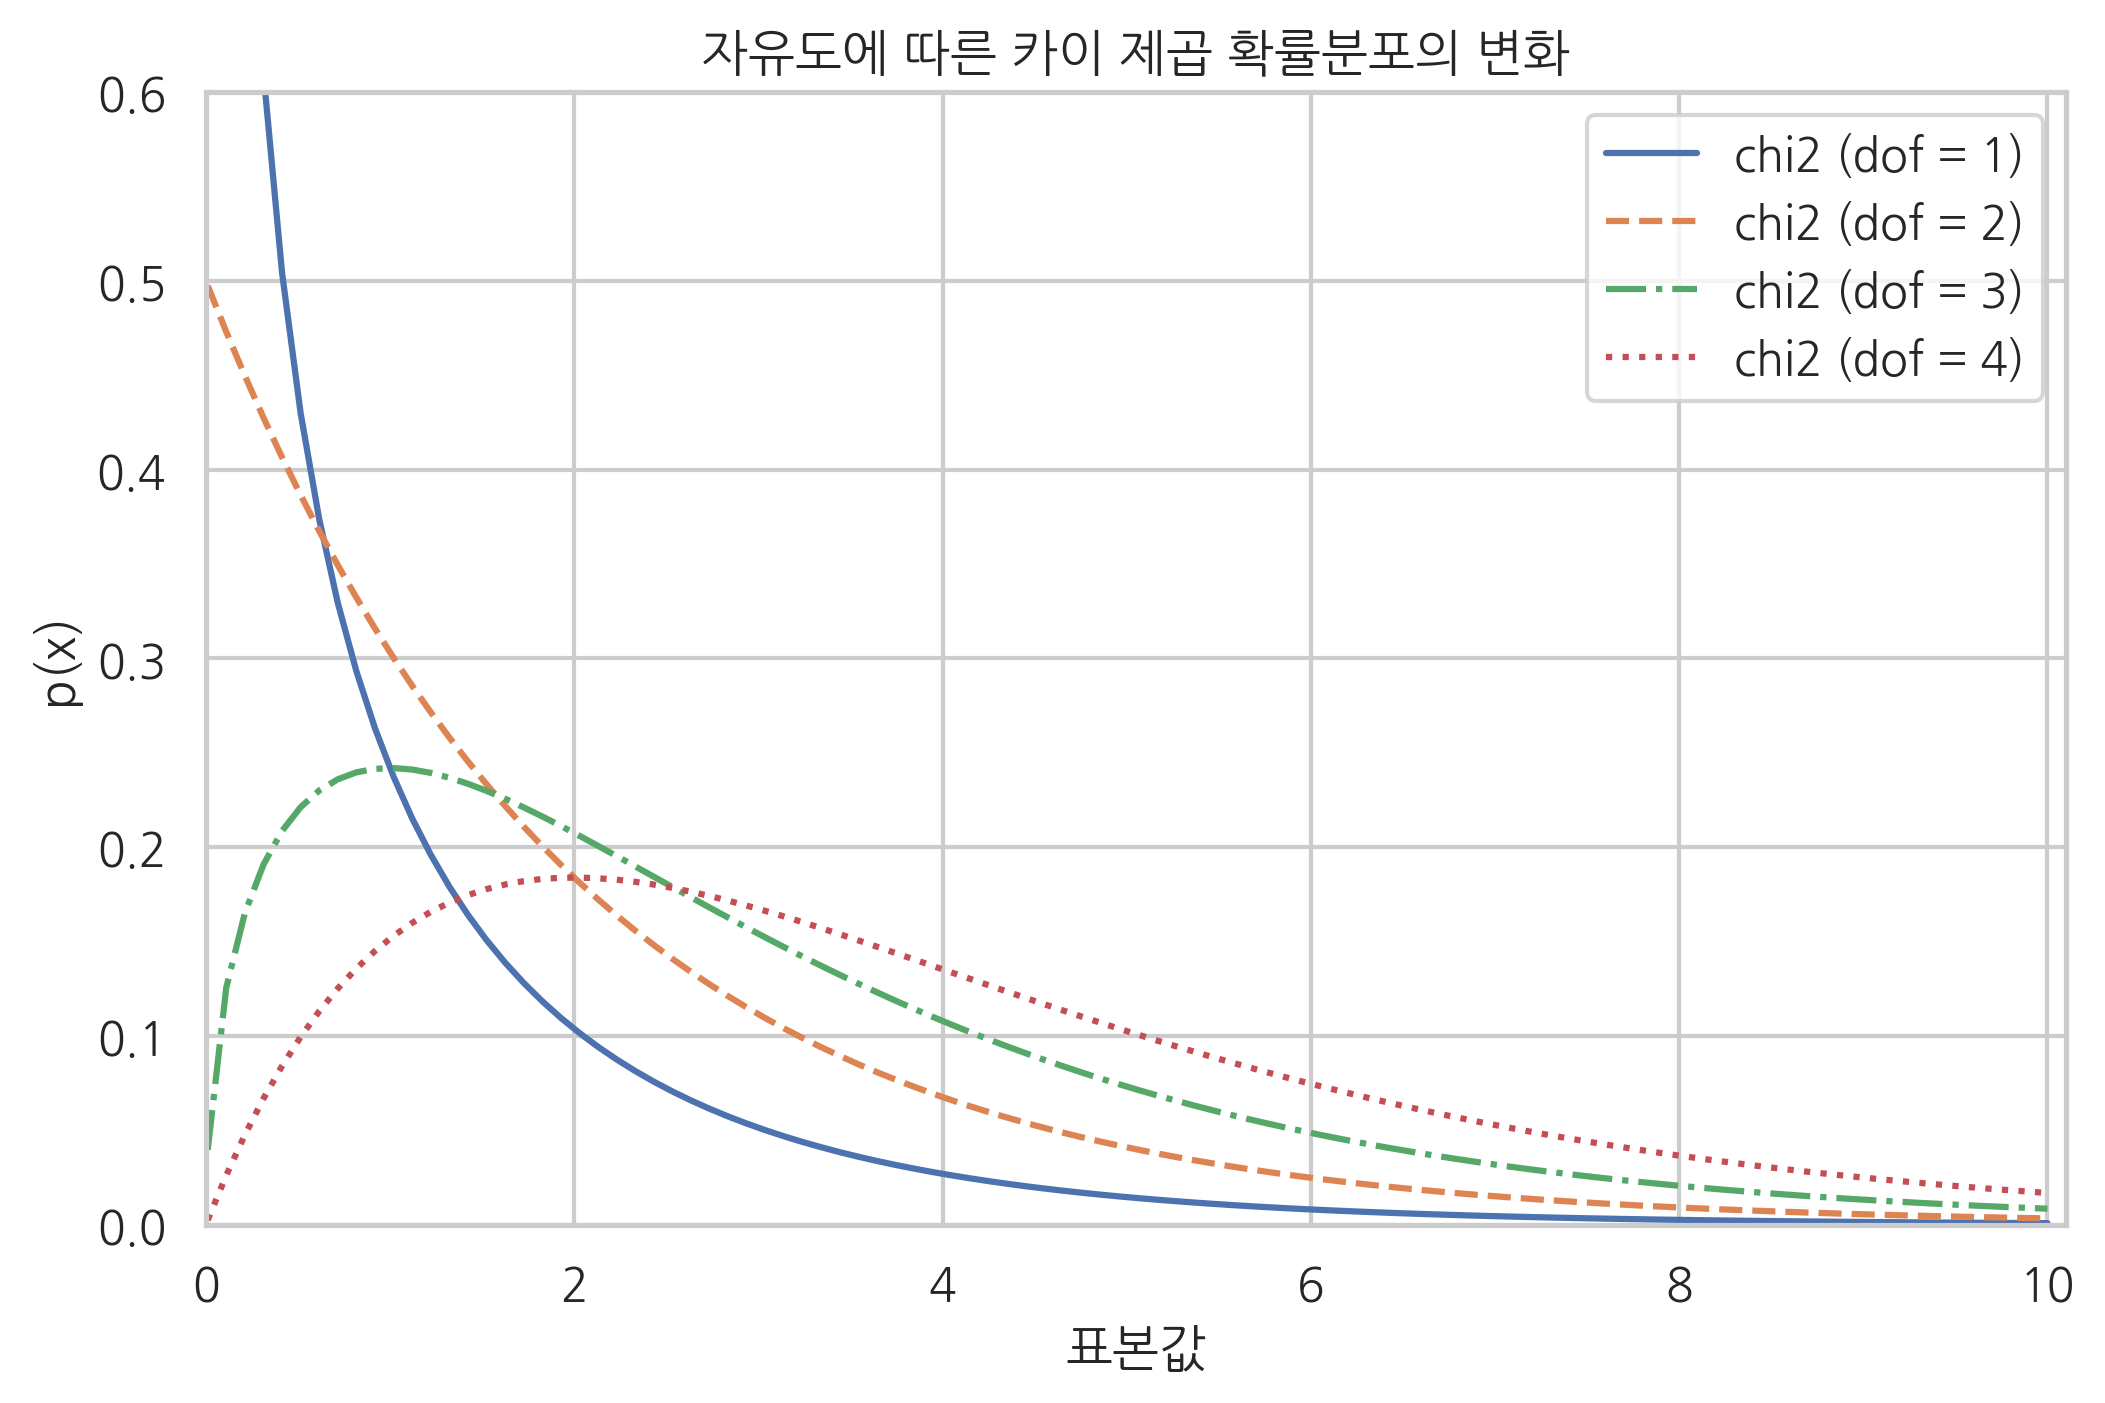

In [1]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("chi2 (dof = %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이 제곱 확률분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

카이 제곱 분포에서 특이한 점은 제곱합을 하는 샘플의 수가 2보다 커지면 0근처의 값이 가장 많이 발생할 것이라는 직관과 달리 0보다 큰 어떤 수가 더 흔하게 발생한다는 점이다. 시뮬레이션을 통해 실제로 제곱합의 분포를 살펴보면 다음과 같다. 왼쪽은 정규 분포의 샘플을 단순히 제곱한 값의 분포이고 오른쪽은 정규 분포의 샘플 4개를 제곱하여 합한 값의 분포이다. 오른쪽 분포는 0이 아닌 1 근처의 값이 가장 많이 나오는 것을 볼 수 있다.

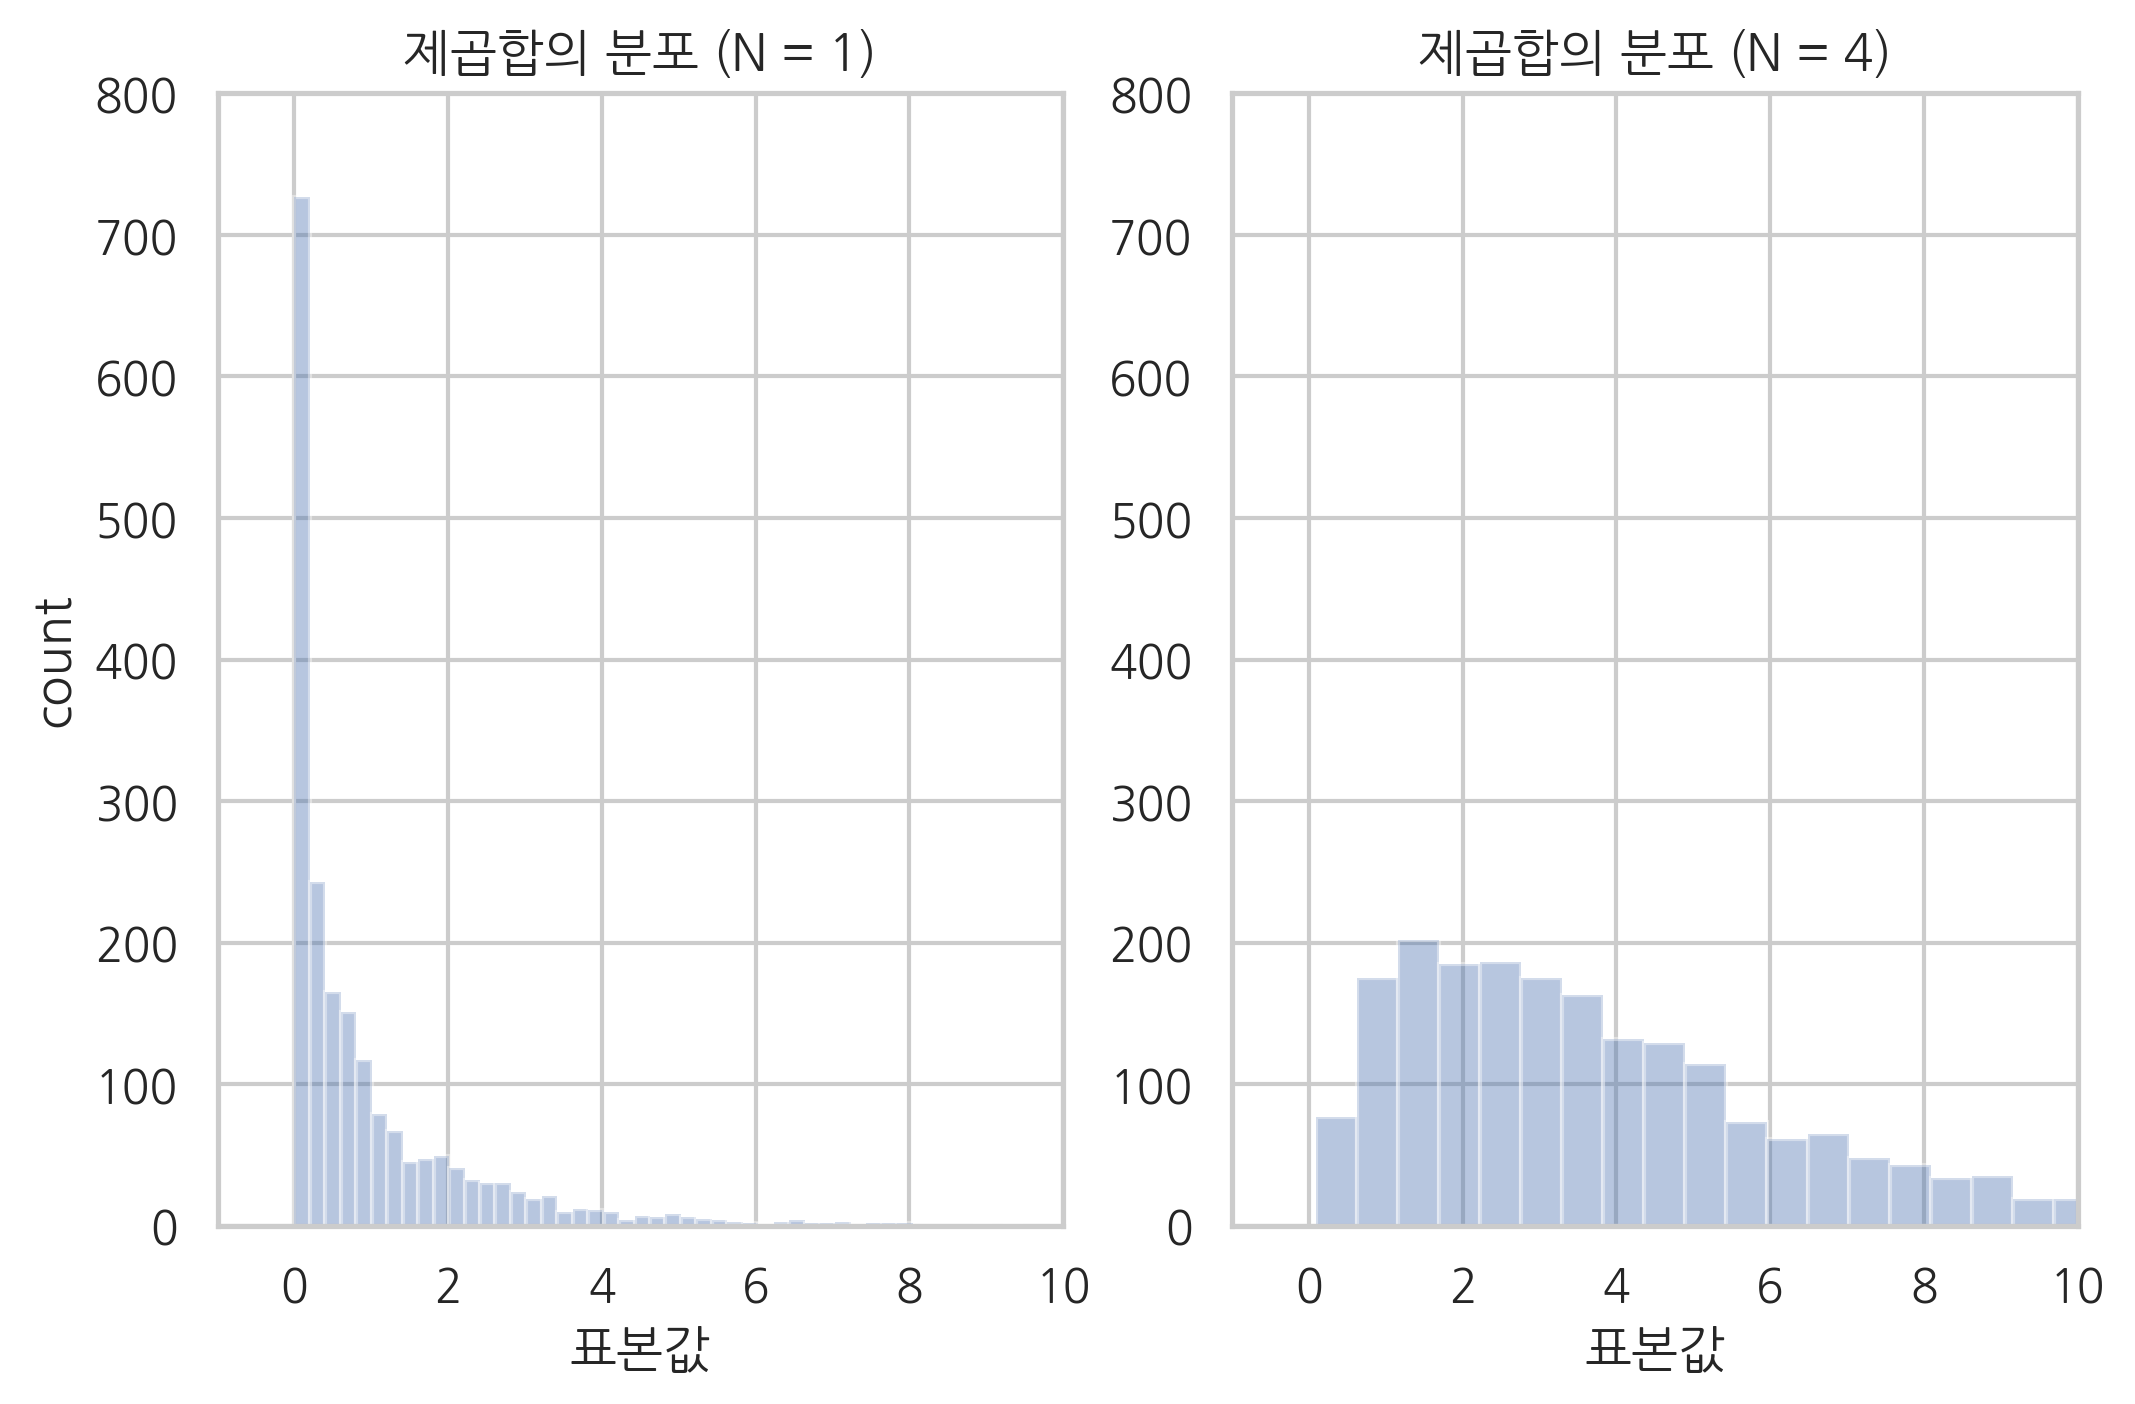

In [2]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 1)")
plt.xlabel("표본값")
plt.ylabel("count")

plt.subplot(1, 2, 2)
N = 4
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 4)")
plt.xlabel("표본값")

plt.show()

#### 연습 문제 8.3.2

$N$이 다음과 같을 때 정규 분포에서 나온 표본의 제곱합이 이루는 분포를 시뮬레이션으로 구하고 히스토그램으로 나타내라.

1. $N=2$일 때
2. $N=30$일 때